In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Flatten
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:
nc = 10 # Number of classes

#This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, 
#along with a test set of 10,000 images. This dataset can be used as a drop-in 
#replacement for MNIST.

(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

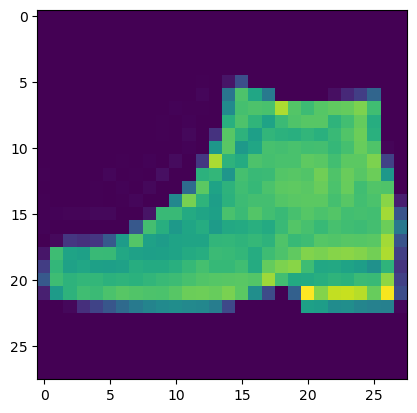

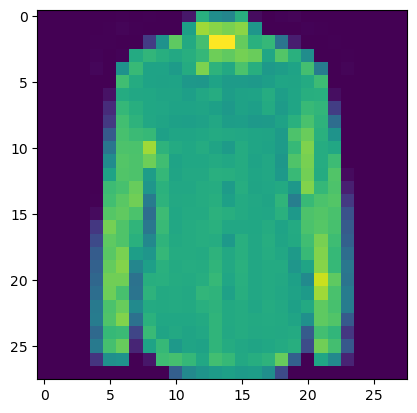

In [3]:
#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

In [4]:
Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)

In [12]:
from sklearn.preprocessing import OneHotEncoder
# converted to a numerical array of size nc x 1
# like 0000100000 or 0100000000
oh = OneHotEncoder()
ytrainEnc = oh.fit_transform([[elem] for elem in ytrain]).toarray()
ytrainEnc

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
ytestEnc = oh.fit_transform([[elem] for elem in ytest]).toarray()
ytestEnc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [15]:
model.fit(Xtrain, ytrainEnc, validation_data=(Xtest, ytestEnc), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 122s 64ms/step - loss: 0.6270 - accuracy: 0.8337 - val_loss: 0.4238 - val_accuracy: 0.8563
Epoch 2/3
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3434 - accuracy: 0.8756 - val_loss: 0.3723 - val_accuracy: 0.8642
Epoch 3/3
1875/1875 [==============================] - 112s 59ms/step - loss: 0.2874 - accuracy: 0.8945 - val_loss: 0.3491 - val_accuracy: 0.8732
